In [1]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [2]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 5,
    'n_epoch': 20,
    'lr': 0.001,
    'verbose': False,
    'eval_freq': 100,
    'batch_size': 1,
    'split': 0.8,
    'log': False,
    'action_dim': 1
}

policy_cfg = {
    'timesteps': 1000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 1
}

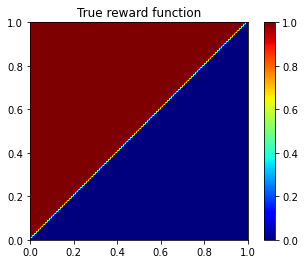

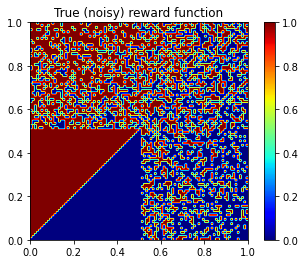

In [3]:
## Setup

iterations = 50

# Create comparison function
f = lambda x: (x[0])**2
var_1, var_2 = 0.00, 1.00
reward_fn_true = lambda x : f(x)
seed = None
np.random.seed(seed)
noise_fn = lambda x: step_noise(x[0], x_step=0.5, var_1=var_1, var_2=var_2, seed=seed)
reward_fn_true_noisy = create_reward_fn_1(f, noise_fn, seed=seed)
comparison_fn = create_comparison_fn_1(f, noise_fn, seed=seed)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(1,)) for _ in range(n)])

# Plot true reward function
vis_fn = lambda fn, title: visualize_fn_1(fn, title=title, x_range=[0,1], x_step=0.01)
vis_fn(reward_fn_true, title="True reward function")
vis_fn(reward_fn_true_noisy, title="True (noisy) reward function")

In [4]:
## Run feedback loop

comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print(f"Iteration {i}", end=",")
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    # plot_sampler_1(samples[i], title=str(i), n=1000)
    # vis_fn(reward_fns[i], title=str(i))

Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,Iteration 5,Iteration 6,Iteration 7,Iteration 8,Iteration 9,Iteration 10,Iteration 11,Iteration 12,Iteration 13,Iteration 14,Iteration 15,Iteration 16,Iteration 17,Iteration 18,Iteration 19,Iteration 20,Iteration 21,Iteration 22,Iteration 23,Iteration 24,Iteration 25,Iteration 26,Iteration 27,Iteration 28,Iteration 29,Iteration 30,Iteration 31,Iteration 32,Iteration 33,Iteration 34,Iteration 35,Iteration 36,Iteration 37,Iteration 38,Iteration 39,Iteration 40,Iteration 41,Iteration 42,Iteration 43,Iteration 44,Iteration 45,Iteration 46,Iteration 47,Iteration 48,Iteration 49,

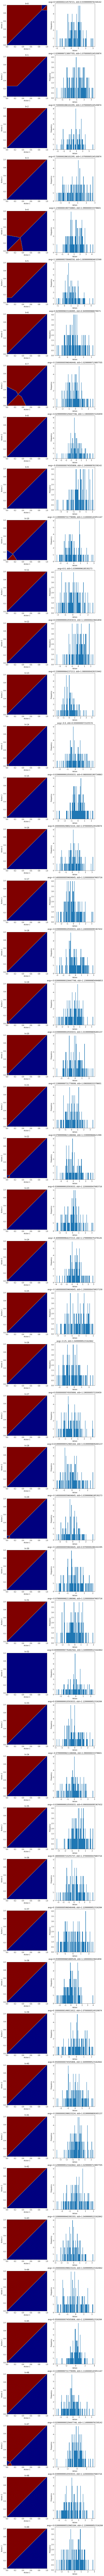

<Figure size 432x288 with 0 Axes>

In [5]:
# Visualize results

visualize_res_1(reward_fns, samples, figsize=(10,6*iterations), save="1d_res", round=2)